con los datos despues de la ayuda de chille

In [416]:
import pandas as pd

## IDEAS 
* nueva columna: tiempo_llegada_real --> hora llegada - hora inicio
* grafica: *'origen'* que mas tarda *'tiempo_llegada_real'* en llegar a su *'destino'*

In [417]:
df_transformed_2 = pd.read_excel('df_transformed_2-chille.xlsx')
df_transformed_2.head(3)

,id,origen,destino,razon_viaje,transporte_utilizado,num_transbordos,tiempo_llegada,hora_inicio,hora_llegada,frecuencia_viaje,...,genero,ocupacion,ingreso_mensual,vehiculos_hogar,factores_importantes,cambios_viaje,mejoras_transporte,acompanamiento,gasto_mensual_transporte,seguridad_trayecto
0,2024-09-24 13:50:12.040,"(31.8665547, -116.6674900) coordenadas",centro,Estudio,Autobús,0,30 min,13:30:00,14:10:00,3 veces por semana,...,Masculino,Estudiante,8 mil - 10 mil,0,"Tiempo, Costo, Seguridad, Comodidad",Ninguno,"Camiones en mejor estado, así como un mejor ma...",Compañeros,250,2
1,2024-09-28 08:56:42.691,17_abril,valle_dorado,Estudio,Autobús,2,1 hora aproximadamente,12:00:00,01:00:00,Diariamente,...,Masculino,Estudiante,menos de 8 mil,1,"Tiempo, Costo",No,Que implementen más transportes en las rutas d...,Solo,440 pesos,3
2,2024-09-26 13:41:44.394,20 de noviembre y novena,cicese,Estudio,Autobús,0,10 o 15 minutos solo en el camino,08:00:00,08:15:00,Diariamente,...,Femenino,Estudiante,12 mil - 14 mil,0,Costo,No,"La unidades son casi obsoletas, pequeñas, sin ...",No,500,1


# un poco mas de transformacion

### seguridad_trayecto, satisfaccion_transporte y nivel_confort 

(asignar palabras)

In [418]:
# Diccionario de mapeo
mapeo_valores = {
    1: 'Muy bajo',
    2: 'Bajo',
    3: 'Regular',
    4: 'Alto',
    5: 'Muy alto'
}

# aplicar el mapeo a las columnas
df_transformed_2['seguridad_trayecto'] = df_transformed_2['seguridad_trayecto'].replace(mapeo_valores)
df_transformed_2['satisfaccion_transporte'] = df_transformed_2['satisfaccion_transporte'].replace(mapeo_valores)
df_transformed_2['nivel_confort'] = df_transformed_2['nivel_confort'].replace(mapeo_valores)

# resultado
print(df_transformed_2[['seguridad_trayecto', 'satisfaccion_transporte', 'nivel_confort']].head())


  seguridad_trayecto satisfaccion_transporte nivel_confort
0               Bajo                Muy bajo      Muy bajo
1            Regular                    Bajo      Muy bajo
2           Muy bajo                Muy bajo      Muy bajo
3           Muy bajo                    Bajo      Muy bajo
4               Bajo                    Bajo          Bajo


In [419]:
df_transformed_2.head(1)

,id,origen,destino,razon_viaje,transporte_utilizado,num_transbordos,tiempo_llegada,hora_inicio,hora_llegada,frecuencia_viaje,...,genero,ocupacion,ingreso_mensual,vehiculos_hogar,factores_importantes,cambios_viaje,mejoras_transporte,acompanamiento,gasto_mensual_transporte,seguridad_trayecto
0,2024-09-24 13:50:12.040,"(31.8665547, -116.6674900) coordenadas",centro,Estudio,Autobús,0,30 min,13:30:00,14:10:00,3 veces por semana,...,Masculino,Estudiante,8 mil - 10 mil,0,"Tiempo, Costo, Seguridad, Comodidad",Ninguno,"Camiones en mejor estado, así como un mejor ma...",Compañeros,250,Bajo


### edades en intervalos

primero nos quedamos solo con los numeros

In [420]:
# Limpiar la columna 'edad' extrayendo números y asignar 24 donde falten valores
df_transformed_2['edad'] = df_transformed_2['edad'].astype(str).str.extract(r'(\d+)')
df_transformed_2['edad'] = df_transformed_2['edad'].fillna(24)
df_transformed_2['edad'] = df_transformed_2['edad'].astype(int)

# Verificar el resultado
print(df_transformed_2['edad'].head())


0    25
1    22
2    35
3    21
4    20
Name: edad, dtype: int64


In [421]:
# Crear los intervalos personalizados
bins = [0, 17, 22, 27, 35, float('inf')]
labels = ['18-', '18-22', '23-27', '28-35', '35+']

# Aplicar la división de edades en intervalos
df_transformed_2['edad_intervalos'] = pd.cut(df_transformed_2['edad'], bins=bins, labels=labels, right=True)

# Mostrar las primeras filas con los intervalos asignados
print(df_transformed_2[['edad', 'edad_intervalos']].head())


   edad edad_intervalos
0    25           23-27
1    22           18-22
2    35           28-35
3    21           18-22
4    20           18-22


### nueva columna: tiempo_llegada_real --> hora llegada - hora inicio

In [422]:
# Convert the columns to datetime format (if necessary)
df_transformed_2['hora_inicio'] = pd.to_datetime(df_transformed_2['hora_inicio'], format='%H:%M:%S')
df_transformed_2['hora_llegada'] = pd.to_datetime(df_transformed_2['hora_llegada'], format='%H:%M:%S')

# Create the new column with the time difference
df_transformed_2['tiempo_llegada_real'] = df_transformed_2['hora_llegada'] - df_transformed_2['hora_inicio']

# ======= los que no tienen 0 en dias no tienen sentido =======

# Extraer la parte de los días del timedelta
df_transformed_2['dias'] = df_transformed_2['tiempo_llegada_real'].dt.days

# Eliminar las filas donde 'dias' no sea 0
df_transformed_2 = df_transformed_2[df_transformed_2['dias'] == 0]

# Eliminar la columna 'dias' si ya no la necesitas
df_transformed_2 = df_transformed_2.drop('dias', axis=1)

# ======= solucionado lo de los dias =======

# Print the DataFrame to see the new column
df_transformed_2['tiempo_llegada_real']

0     0 days 00:40:00
2     0 days 00:15:00
3     0 days 01:30:00
4     0 days 01:30:00
5     0 days 00:30:00
            ...      
537   0 days 01:15:00
538   0 days 02:00:00
539   0 days 00:10:00
540   0 days 01:30:00
541   0 days 02:42:00
Name: tiempo_llegada_real, Length: 530, dtype: timedelta64[ns]

In [423]:
print(df_transformed_2['tiempo_llegada_real'].dt.components.head())

   days  hours  minutes  seconds  milliseconds  microseconds  nanoseconds
0     0      0       40        0             0             0            0
2     0      0       15        0             0             0            0
3     0      1       30        0             0             0            0
4     0      1       30        0             0             0            0
5     0      0       30        0             0             0            0


<h3> lo voy a dejar para despues </h3>

In [ ]:
df_transformed_2

# 1. frecuencias de los origenes y destinos

In [424]:
# Contar las frecuencias de los orígenes en orden descendente
origenes_frecuentes = df_transformed_2['origen'].value_counts()

# top 10
print(origenes_frecuentes.head(10))

origen
sauzal                  54
centro                  38
moderna                 30
valle_dorado            27
playitas                24
maneadero               18
uabc_sauzal             12
valle_de_chapultepec    11
valle_verde             10
encinos                  9
Name: count, dtype: int64


In [425]:
# Contar las frecuencias de los destinos en orden descendente
origenes_frecuentes = df_transformed_2['destino'].value_counts()

# top 10
print(origenes_frecuentes.head(10))

destino
cicese                                      196
uabc_sauzal                                 110
valle_dorado                                 62
unam                                         28
centro                                       25
cetmar                                       19
sauzal                                       14
playitas                                     14
costco                                        3
universidad autonoma de baja california       2
Name: count, dtype: int64


# 2. Graficos

## Origenes y Destinos

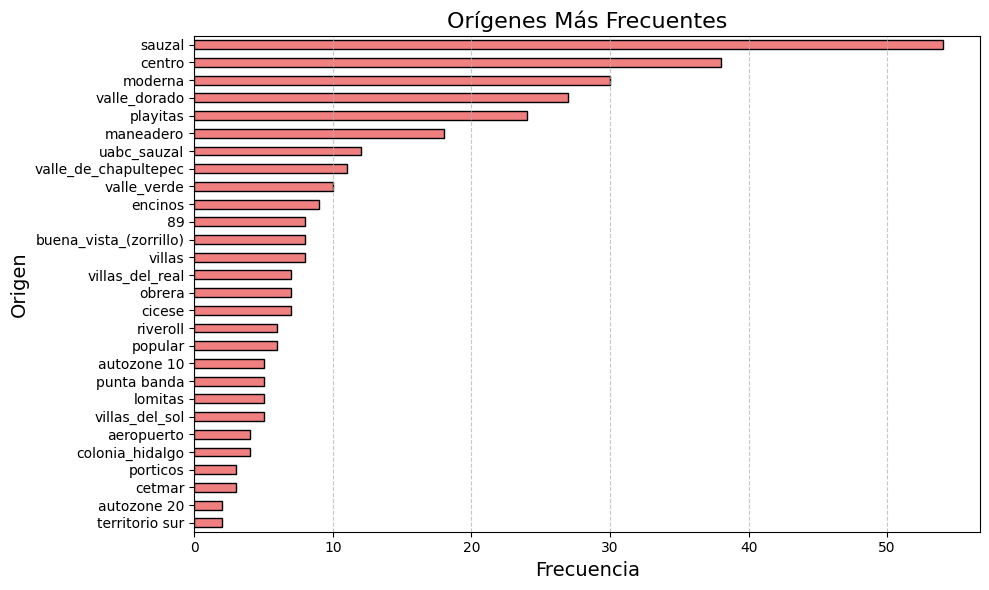

In [426]:
import matplotlib.pyplot as plt

#re: 
origenes_frecuentes = df_transformed_2['origen'].value_counts().head(28)

# Gráfico de barras horizontales
plt.figure(figsize=(10, 6))
origenes_frecuentes.sort_values().plot(kind='barh', color='lightcoral', edgecolor='black')

# Personalizar
plt.title('Orígenes Más Frecuentes', fontsize=16)
plt.xlabel('Frecuencia', fontsize=14)
plt.ylabel('Origen', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


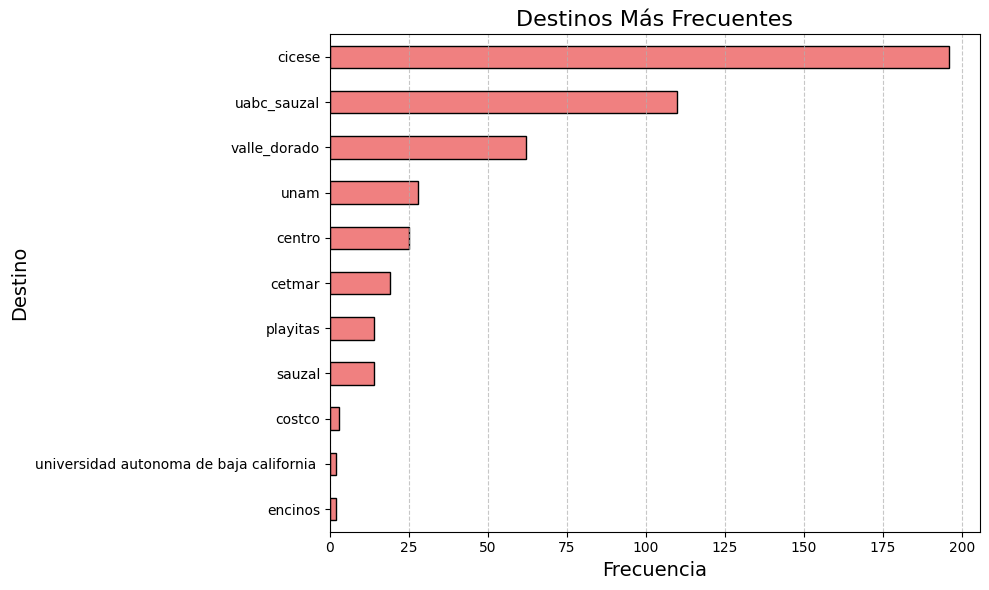

In [427]:
import matplotlib.pyplot as plt

#re: 
destinos_frecuentes = df_transformed_2['destino'].value_counts().head(11)

# Gráfico de barras horizontales
plt.figure(figsize=(10, 6))
destinos_frecuentes.sort_values().plot(kind='barh', color='lightcoral', edgecolor='black')

# Personalizar
plt.title('Destinos Más Frecuentes', fontsize=16)
plt.xlabel('Frecuencia', fontsize=14)
plt.ylabel('Destino', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


## ingreso mensual

In [428]:
ingreso_mensual_frec = df_transformed_2['ingreso_mensual'].value_counts()

ingreso_mensual_frec


ingreso_mensual
menos de 8 mil                            251
12 mil - 14 mil                            71
Más de 16 mil                              63
14 mil - 16 mil                            61
8 mil - 10 mil                             46
10 mil - 12 mil                            35
10 mil                                      1
19 mil pesos                                1
7000 (deposito de parte de mis padres)      1
Name: count, dtype: int64

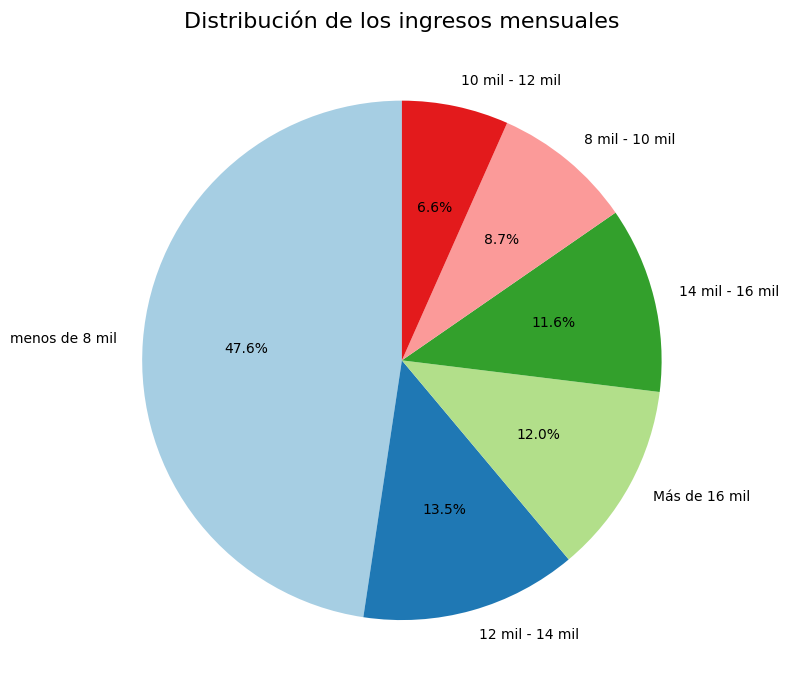

In [429]:
# Crear el gráfico de pastel
plt.figure(figsize=(8, 8))
ingreso_mensual_frec.head(6).plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

# Personalizar
plt.title('Distribución de los ingresos mensuales', fontsize=16)
plt.ylabel('')  # Quitar la etiqueta del eje Y para limpiar el gráfico

plt.tight_layout()
plt.show()


## Vehiculos hogar

In [430]:
vehiculos_hogar_frec = df_transformed_2['vehiculos_hogar'].value_counts()

vehiculos_hogar_frec

vehiculos_hogar
0          297
1          162
2           57
3 o más     14
Name: count, dtype: int64

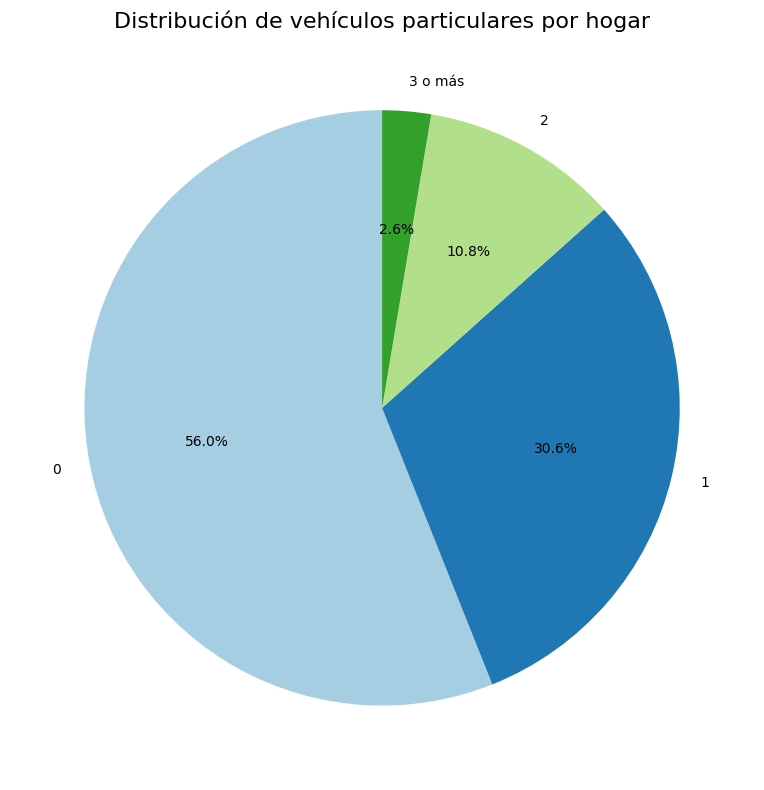

In [431]:
# Crear el gráfico de pastel
plt.figure(figsize=(8, 8))
vehiculos_hogar_frec.head(6).plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

# Personalizar
plt.title('Distribución de vehículos particulares por hogar', fontsize=16)
plt.ylabel('')  # Quitar la etiqueta del eje Y para limpiar el gráfico

plt.tight_layout()
plt.show()

## Factores importantes

analisis: 

In [432]:
factores_importantes_frec = df_transformed_2['factores_importantes'].value_counts()

factores_importantes_frec

factores_importantes
Tiempo, Costo, Seguridad, Comodidad                                                                     116
Costo                                                                                                    69
Tiempo, Costo                                                                                            69
Tiempo, Costo, Seguridad                                                                                 63
Tiempo                                                                                                   57
Tiempo, Seguridad                                                                                        26
Tiempo, Costo, Comodidad                                                                                 20
Tiempo, Seguridad, Comodidad                                                                             19
Seguridad                                                                                                18
Tiempo,

analisis:

In [433]:
# Dividir los factores en listas
factores_separados = df_transformed_2['factores_importantes'].dropna().str.split(',')

# Aplanar la lista de listas y quitar espacios extra
factores_planos = [factor.strip() for sublist in factores_separados for factor in sublist]

# Crear una Serie para contar la frecuencia de cada factor
frecuencias_factores = pd.Series(factores_planos).value_counts()

# Mostrar las frecuencias
print(frecuencias_factores)


Tiempo                                                            392
Costo                                                             371
Seguridad                                                         278
Comodidad                                                         208
La rura                                                             1
Tan solo poder llegar a un lugar                                    1
Es la única opción disponible                                       1
La Ruta del camión                                                  1
Higienico y que se encuentre en optimas condiciones el autobus      1
no tengo opción                                                     1
ya que no cuento con un medio particular                            1
Disponibilidad y cercania a mi ubicacion.                           1
Puntualidad                                                         1
Limpieza                                                            1
Soy foranea         

haremos un analisis de los principales 4, pero presentaremos el resto como respuestas interesantes

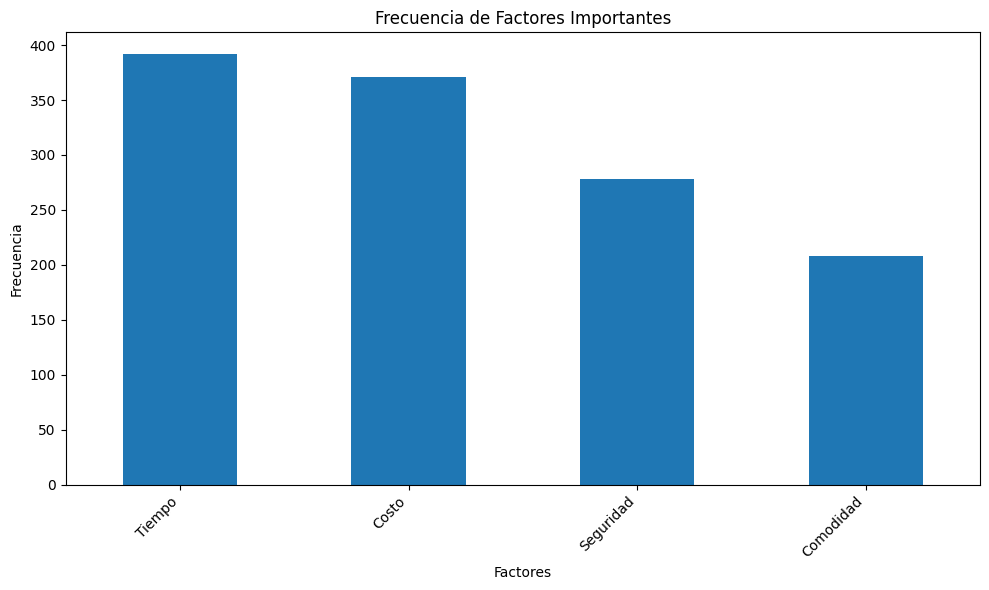

In [434]:
import matplotlib.pyplot as plt

# Crear un gráfico de barras
frecuencias_factores.head(4).plot(kind='bar', figsize=(10, 6))
plt.title('Frecuencia de Factores Importantes')
plt.ylabel('Frecuencia')
plt.xlabel('Factores')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## seguridad_trayecto, satisfaccion_transporte y nivel_confort

analisis

In [435]:
#re: 
seguridad_trayecto_frec = df_transformed_2['seguridad_trayecto'].value_counts()
seguridad_trayecto_frec

seguridad_trayecto
Regular     193
Bajo        140
Muy bajo     92
Alto         67
Muy alto     38
Name: count, dtype: int64

In [436]:
satisfaccion_transporte_frec = df_transformed_2['satisfaccion_transporte'].value_counts()
satisfaccion_transporte_frec

satisfaccion_transporte
Muy bajo    229
Bajo        151
Regular      87
Muy alto     37
Alto         26
Name: count, dtype: int64

In [437]:
nivel_confort_frec = df_transformed_2['nivel_confort'].value_counts()
nivel_confort_frec

nivel_confort
Muy bajo    212
Bajo        165
Regular      98
Muy alto     39
Alto         16
Name: count, dtype: int64

graficos

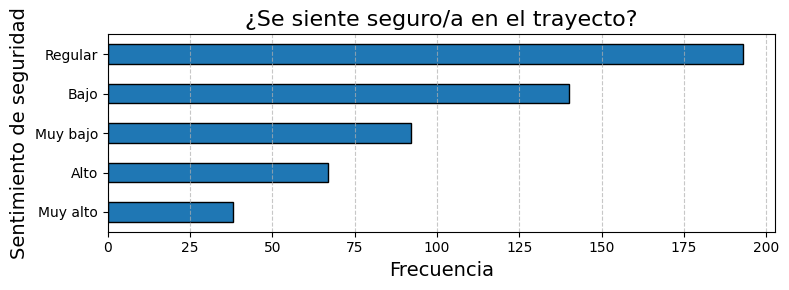

In [438]:
# Gráfico de barras horizontales
plt.figure(figsize=(8, 3))
seguridad_trayecto_frec.sort_values().plot(kind='barh', edgecolor='black')

# Personalizar
plt.title('¿Se siente seguro/a en el trayecto?', fontsize=16)
plt.xlabel('Frecuencia', fontsize=14)
plt.ylabel('Sentimiento de seguridad', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

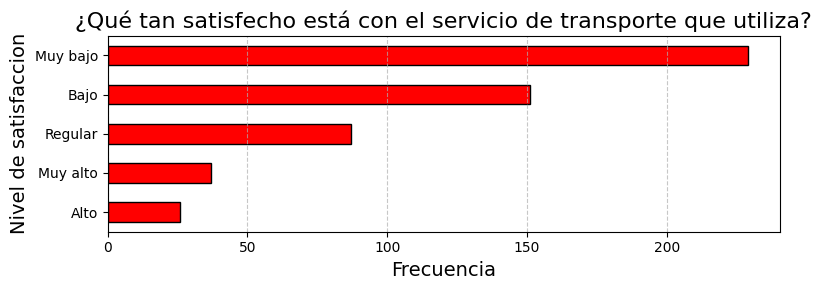

In [439]:
# Gráfico de barras horizontales
plt.figure(figsize=(8, 3))
satisfaccion_transporte_frec.sort_values().plot(kind='barh', color='red', edgecolor='black')

# Personalizar
plt.title('¿Qué tan satisfecho está con el servicio de transporte que utiliza?', fontsize=16)
plt.xlabel('Frecuencia', fontsize=14)
plt.ylabel('Nivel de satisfaccion', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

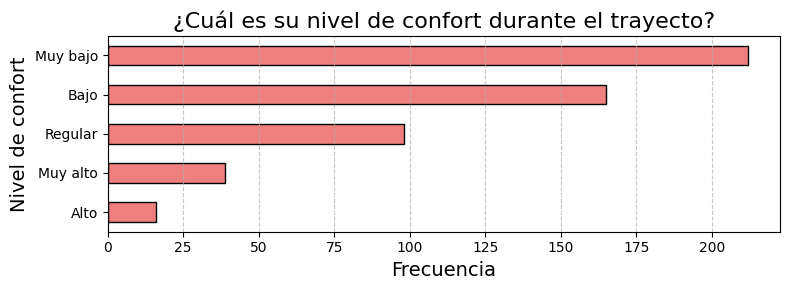

In [440]:
# Gráfico de barras horizontales
plt.figure(figsize=(8, 3))
nivel_confort_frec.sort_values().plot(kind='barh', color='lightcoral', edgecolor='black')

# Personalizar
plt.title('¿Cuál es su nivel de confort durante el trayecto?', fontsize=16)
plt.xlabel('Frecuencia', fontsize=14)
plt.ylabel('Nivel de confort', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## edad

In [441]:
labels = ['18-', '18-22', '23-27', '28-35', '35+']

edad_intervalos_frec = df_transformed_2['edad_intervalos'].value_counts()
edad_intervalos_frec = edad_intervalos_frec.reindex(labels)

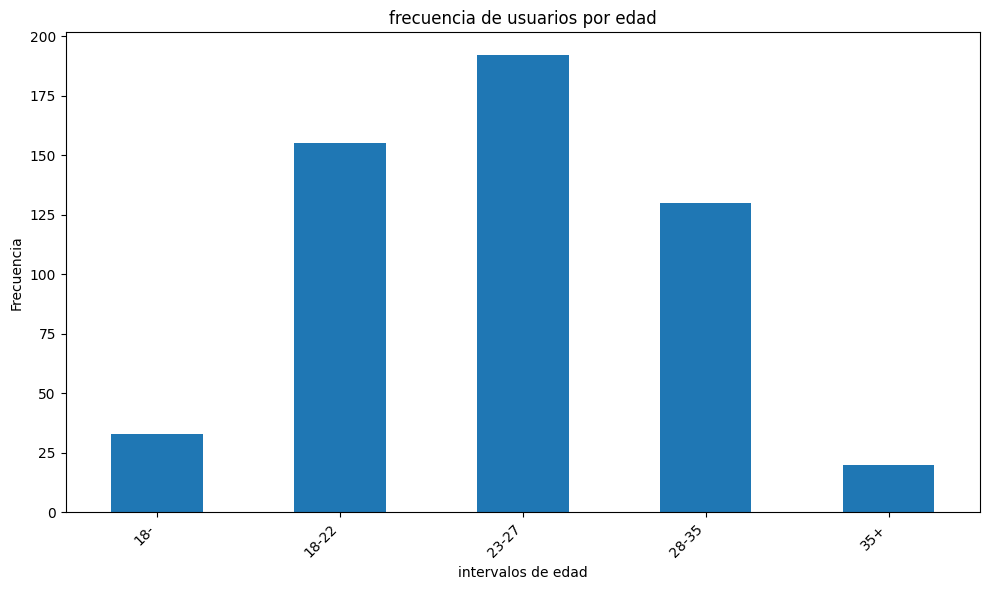

In [442]:
# Crear un gráfico de barras
edad_intervalos_frec.plot(kind='bar', figsize=(10, 6))
plt.title('frecuencia de usuarios por edad')
plt.ylabel('Frecuencia')
plt.xlabel('intervalos de edad')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## razon_transporte: ¿Cuál es la razón principal de su viaje?

In [450]:
razon_transporte_frec = df_transformed_2['razon_transporte'].value_counts()

razon_transporte_frec 

razon_transporte
Es la única opción                                                                                                                                                                                          312
Costo                                                                                                                                                                                                       142
Comodidad                                                                                                                                                                                                    40
Rapidez                                                                                                                                                                                                      22
Es la única opción y por el costo                                                                                                                      

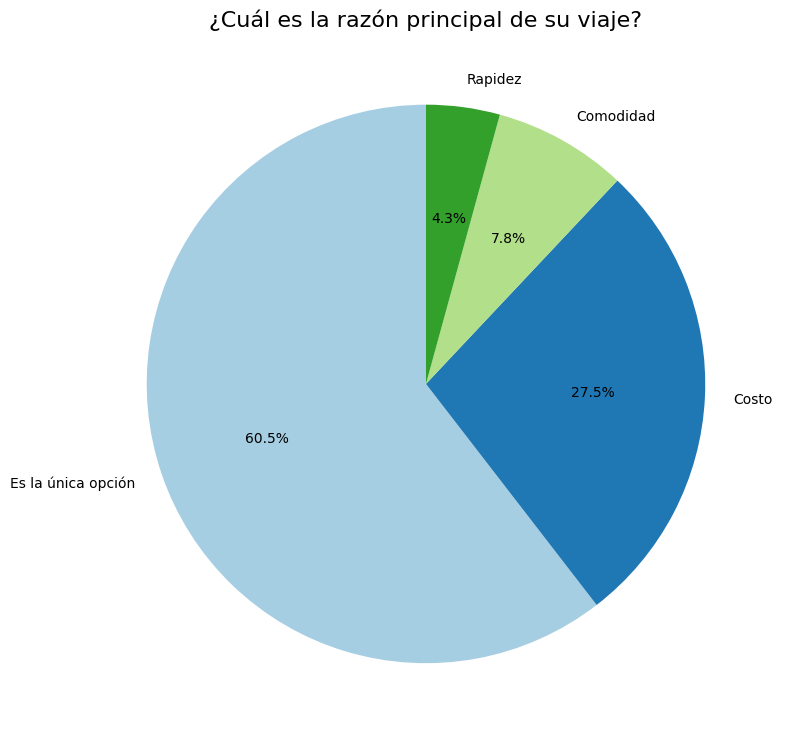

In [454]:
# Crear el gráfico de pastel
plt.figure(figsize=(8, 8))
razon_transporte_frec.head(4).plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

# Personalizar
plt.title('¿Cuál es la razón principal de su viaje?', fontsize=16)
plt.ylabel('')  # Quitar la etiqueta del eje Y para limpiar el gráfico

plt.tight_layout()
plt.show()


## frecuencia_viaje: ¿Con qué frecuencia realiza este viaje?

In [455]:
frecuencia_viaje_frec = df_transformed_2['frecuencia_viaje'].value_counts()
frecuencia_viaje_frec

frecuencia_viaje
Diariamente           443
3 veces por semana     56
2 veces por semana     17
1 vez por semana       11
Diario                  1
5 días a la semana      1
Diariamenre             1
Name: count, dtype: int64

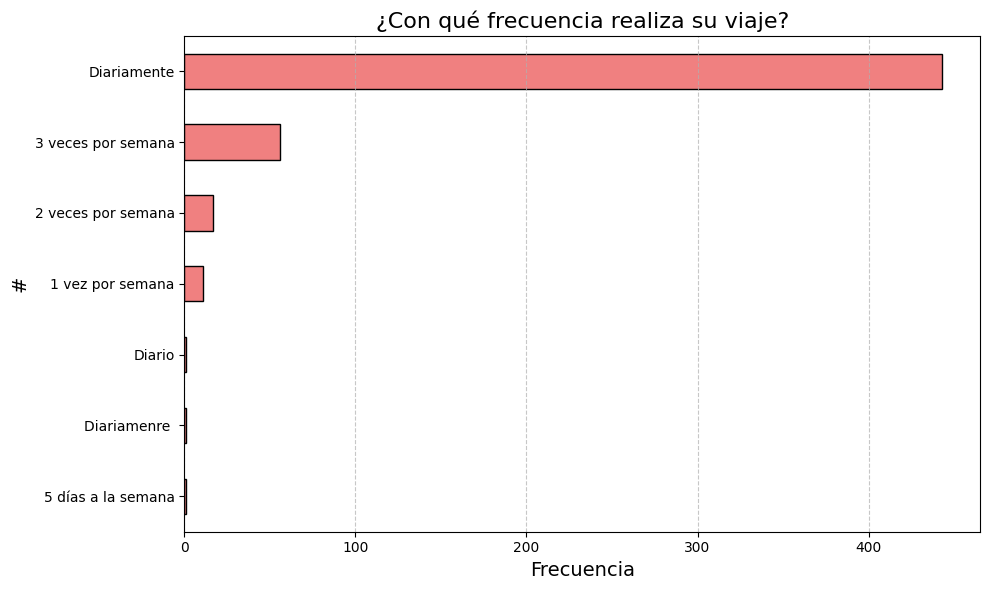

In [456]:
# Gráfico de barras horizontales
plt.figure(figsize=(10, 6))
frecuencia_viaje_frec.sort_values().plot(kind='barh', color='lightcoral', edgecolor='black')

# Personalizar
plt.title('¿Con qué frecuencia realiza su viaje?', fontsize=16)
plt.xlabel('Frecuencia', fontsize=14)
plt.ylabel('#', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## gasto_mensual_transporte: ¿Cuánto gasta en promedio en transporte al mes?

In [ ]:
# Suponiendo que tienes un DataFrame llamado 'df' con una columna 'gasto_mensual_transporte'
# Filtramos los datos que sean convertibles a enteros y que contengan solo un valor
df_transformed_2['gasto_mensual_transporte'] = pd.to_numeric(df_transformed_2['gasto_mensual_transporte'], errors='coerce')
df_transformed_2 = df_transformed_2.dropna(subset=['gasto_mensual_transporte'])
df_transformed_2 = df_transformed_2[df_transformed_2['gasto_mensual_transporte'].astype(int) == df_transformed_2['gasto_mensual_transporte']]

In [459]:
import numpy as np

# Definimos los intervalos de 250
bins = np.arange(0, df_transformed_2['gasto_mensual_transporte'].max() + 250, 250)

In [461]:
df_transformed_2['intervalo_gasto'] = pd.cut(df_transformed_2['gasto_mensual_transporte'], bins)

In [468]:
conteo_por_intervalo = df_transformed_2['intervalo_gasto'].value_counts().sort_index()

conteo_por_intervalo.sort_values(ascending=False)

intervalo_gasto
(250.0, 500.0]      126
(0.0, 250.0]         64
(500.0, 750.0]       46
(750.0, 1000.0]      33
(1750.0, 2000.0]     11
(1000.0, 1250.0]      9
(1250.0, 1500.0]      8
(2250.0, 2500.0]      4
(2750.0, 3000.0]      3
(1500.0, 1750.0]      2
(3750.0, 4000.0]      2
(2000.0, 2250.0]      1
(2500.0, 2750.0]      0
(3000.0, 3250.0]      0
(3250.0, 3500.0]      0
(3500.0, 3750.0]      0
Name: count, dtype: int64

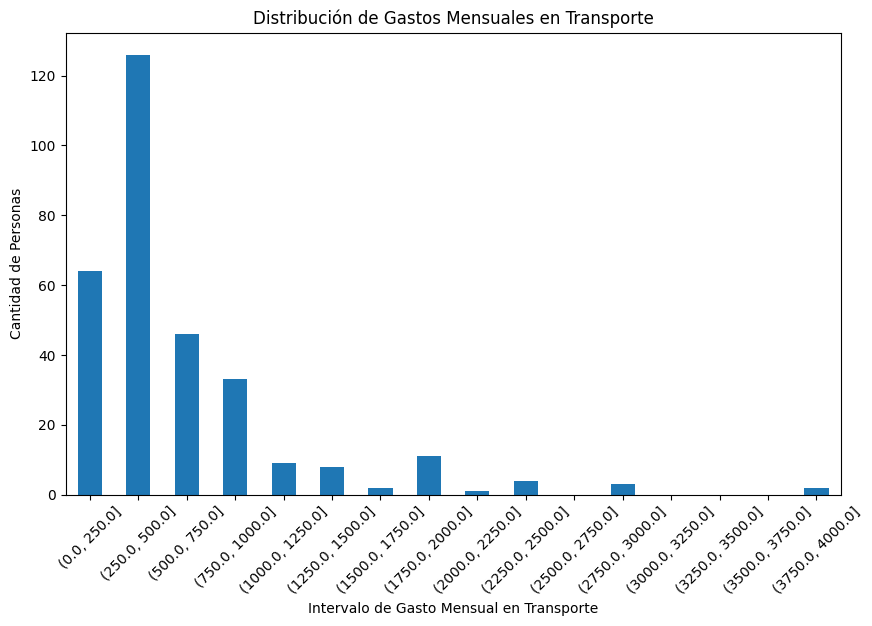

In [463]:
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
conteo_por_intervalo.plot(kind='bar')
plt.xlabel('Intervalo de Gasto Mensual en Transporte')
plt.ylabel('Cantidad de Personas')
plt.title('Distribución de Gastos Mensuales en Transporte')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.show()

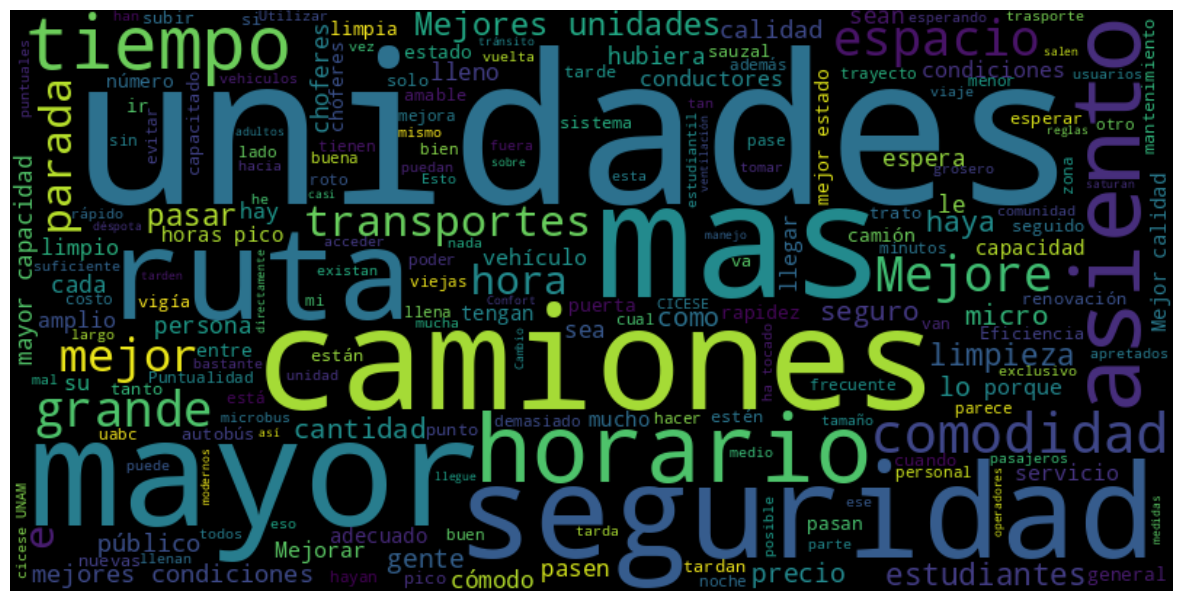

In [487]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Suponiendo que tienes un DataFrame llamado 'df' y que 'respuestas' es una lista con todas las respuestas
respuestas = df_transformed_2['mejoras_transporte'].tolist()

# Unir todas las respuestas en un solo texto
texto = ' '.join(respuestas)

# Lista de stop words personalizadas
stopwords = set(['el', 'la', 'no', 'autobuses', 'ya', 'o', 'estudiante', 'también', 'transporte', 'me', 'uno', 'al', 'del', 'se', 'al', 'con', 'son', 'hasta', 'y', 'tambien','los', 'las', 'de', 'en', 'por', 'para', 'que', 'a', 'un', 'una', 'más', 'menos', 'muy', 'siempre', 'nunca', 'ser', 'estar', 'haber', 'tener', 'yo', 'tú', 'él', 'ella', 'nosotros', 'vosotros', 'ellos', 'ellas', 'cosa', 'algo', 'todo', 'veces', 'frecuencia', 'siempre', 'nunca', 'aquí', 'allá', 'donde'])

# Crear la nube de palabras con las stop words
wordcloud = WordCloud(width=800, height=400, stopwords=stopwords).generate(texto)


# Mostrar la nube de palabras
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# rutas mas transitadas? 

* para este nos puede convenir agrupar uabc_sauzal-playitas-cicese-unam

La ruta más transitada es: centro → cicese con 15 viajes.


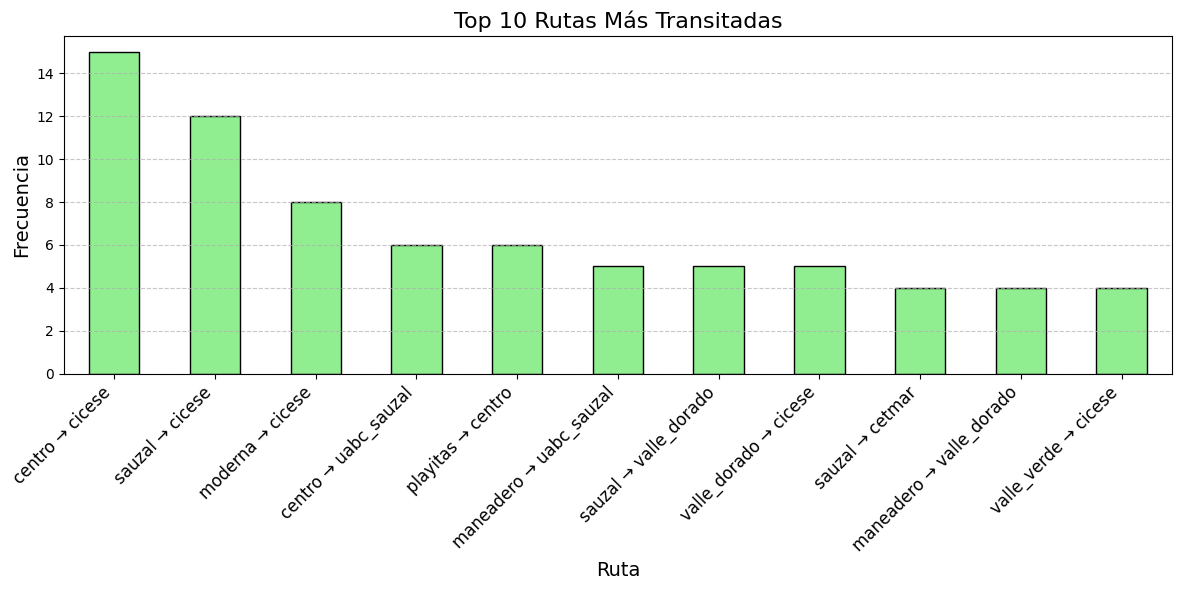

In [488]:
# columna que combine 'origen' y 'destino' para representar las rutas
df_transformed_2['ruta'] = df_transformed_2['origen'] + ' → ' + df_transformed_2['destino']

# frecuencia de cada ruta
rutas_frecuentes = df_transformed_2['ruta'].value_counts()

# ruta mas transitada
ruta_mas_transitada = rutas_frecuentes.idxmax()
frecuencia_maxima = rutas_frecuentes.max()

print(f"La ruta más transitada es: {ruta_mas_transitada} con {frecuencia_maxima} viajes.")

# plot 10 rutas más transitadas
plt.figure(figsize=(12, 6))
rutas_frecuentes.head(11).plot(kind='bar', color='lightgreen', edgecolor='black')

# plot
plt.title('Top 10 Rutas Más Transitadas', fontsize=16)
plt.xlabel('Ruta', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


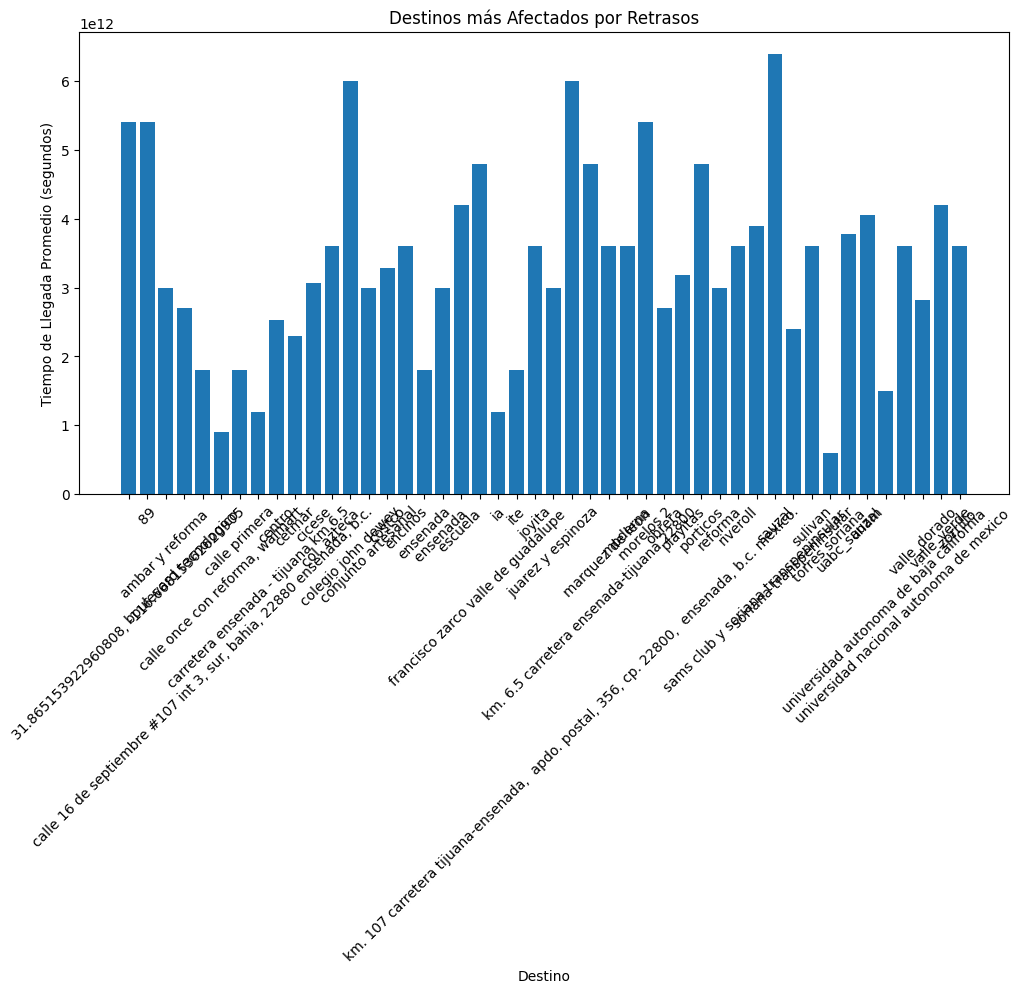

In [492]:
import pandas as pd
import matplotlib.pyplot as plt

# Agrupar por destino y calcular el tiempo promedio de llegada
df_grouped = df_transformed_2.groupby('destino')['tiempo_llegada_real'].mean().reset_index()

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(df_grouped['destino'], df_grouped['tiempo_llegada_real'])
plt.xlabel('Destino')
plt.ylabel('Tiempo de Llegada Promedio (segundos)')
plt.title('Destinos más Afectados por Retrasos')
plt.xticks(rotation=45)
plt.show()

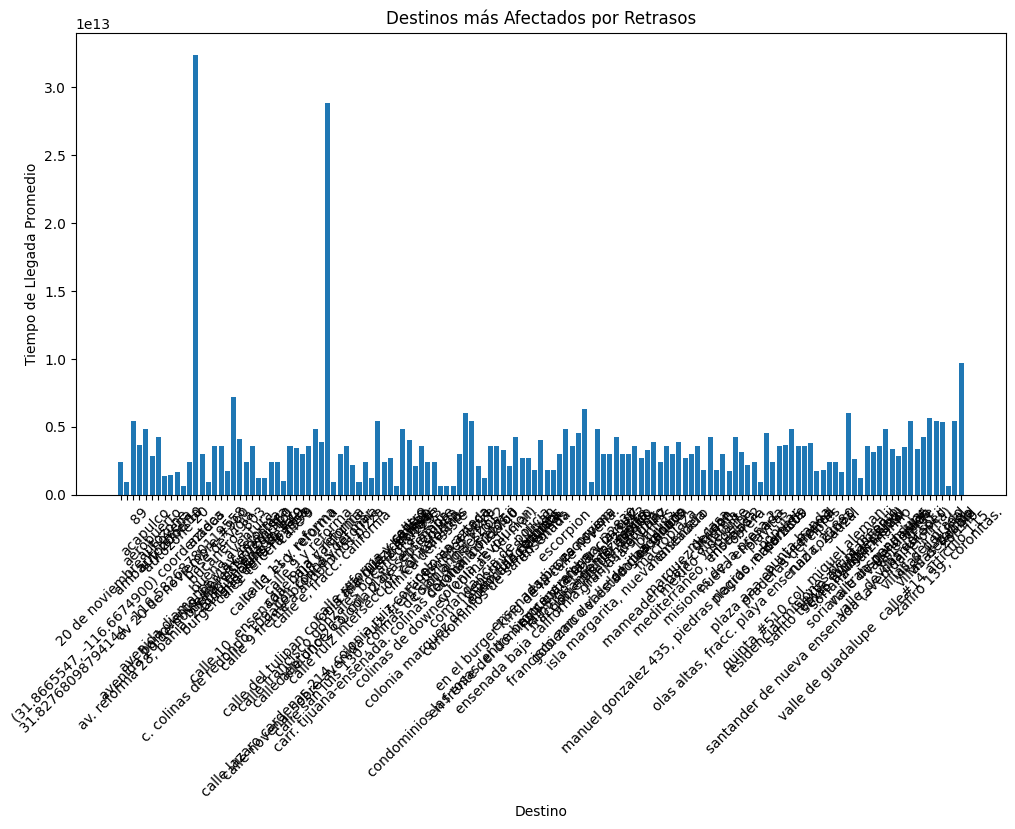

In [498]:
import pandas as pd
import matplotlib.pyplot as plt

# Agrupar por destino y calcular el tiempo promedio de llegada
df_grouped = df_transformed_2.groupby('origen')['tiempo_llegada_real'].mean().reset_index()

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(df_grouped['origen'], df_grouped['tiempo_llegada_real'])
plt.xlabel('Destino')
plt.ylabel('Tiempo de Llegada Promedio')
plt.title('Destinos más Afectados por Retrasos')
plt.xticks(rotation=45)
plt.show()

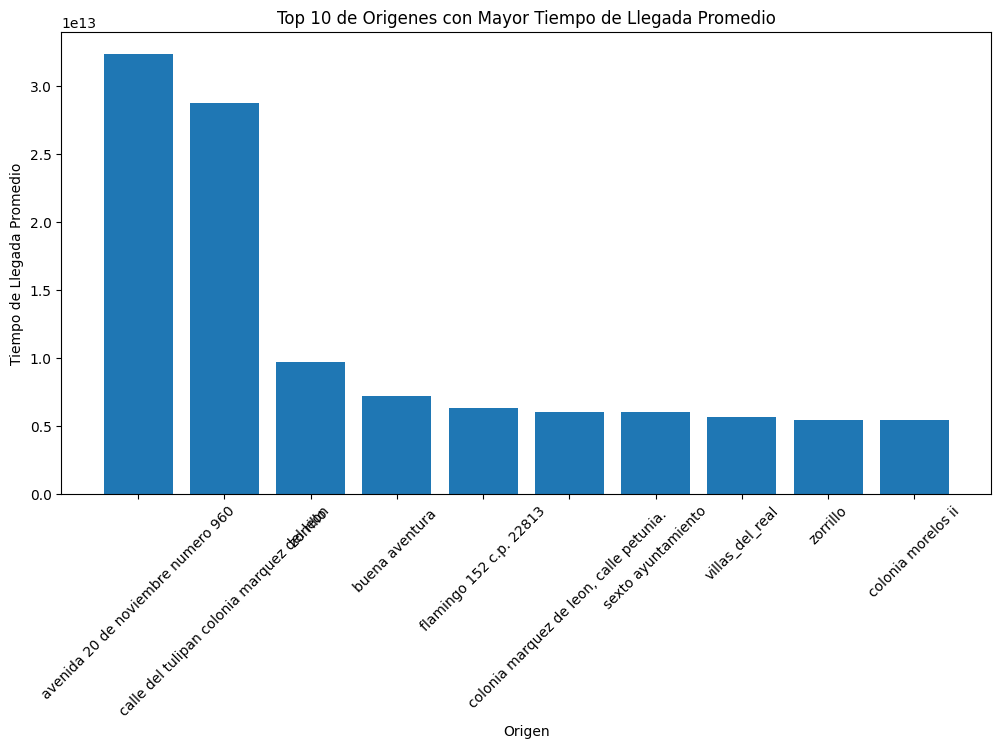

In [499]:
import pandas as pd
import matplotlib.pyplot as plt

# Agrupar por destino y calcular el tiempo promedio de llegada
df_grouped = df_transformed_2.groupby('origen')['tiempo_llegada_real'].mean().reset_index()

# Ordenar los destinos por tiempo de llegada promedio de forma descendente
df_grouped = df_grouped.sort_values(by='tiempo_llegada_real', ascending=False)

# Seleccionar los 10 primeros destinos
top_10_destinos = df_grouped.head(10)

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(top_10_destinos['origen'], top_10_destinos['tiempo_llegada_real'])
plt.xlabel('Origen')
plt.ylabel('Tiempo de Llegada Promedio')
plt.title('Top 10 de Origenes con Mayor Tiempo de Llegada Promedio')
plt.xticks(rotation=45)
plt.show()